In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import AffinityPropagation
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import seaborn as sns


In [2]:
data = pd.read_csv('Mall_Customers.csv').dropna().drop('CustomerID', axis=1)
data

,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40
...,...,...,...,...
195,Female,35,120,79
196,Female,45,126,28
197,Male,32,126,74
198,Male,32,137,18


In [3]:
# Select relevant features for clustering
features = ['Annual Income (k$)', 'Spending Score (1-100)']
X = data[features]
# Standardize the data
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

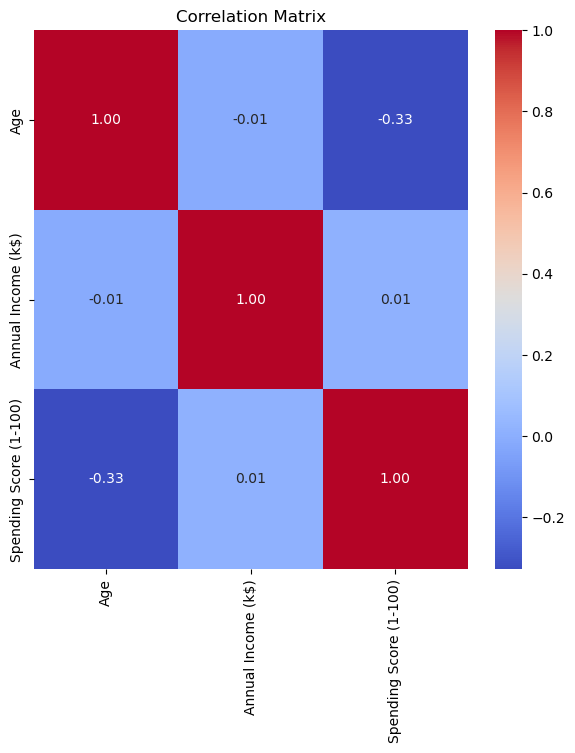

In [4]:
# Correlation Matrix
correlation_matrix = data.corr(numeric_only=True)
plt.figure(figsize=(7, 7))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

Preference: The preference parameter plays an important role and represents the input that indicates how likely a data point is to be chosen as an exemplar.

 It influences the number of clusters that will be formed and the data points that will be assigned as exemplars

max_iter: This parameter determines the maximum number of iterations (passes over the data) which will be performed by the Affinity Propagation algorithm before terminating. The default value is 200 but here we have used higher value which is better for convergence.

convergence_iter: This parameter controls the number of iterations with no change in the cluster assignments which must occur for the algorithm to consider the solution as converged. We have set it to 16 which means the algorithm will continue iterating until it finds a solution where the cluster assignments do not change for 16 consecutive iterations, indicating convergence.

random_state: This parameter handles the randomness which ensures the initialization of cluster centers and the order of processing data points remains same between different runs.

damping: It controls the convergence speed of the algorithm which it set to 0.9(close to 1) means that algorithm converges more slowly. This is used for more stable and accurate cluster assignments.

Preference parameter impact on Affinity Propagation Clustering
The code creates a line plot to visualize the relationship between preference values and silhouette scores, aiding in the selection of an optimal preference parameter for clustering.

In [14]:
af = AffinityPropagation(preference= -20, max_iter=70, damping=0.9, random_state=32, convergence_iter=25).fit(X_std)

# Predict cluster labels
cluster_labels = af.labels_
cluster_labels


array([0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 2, 1, 2, 2,
       0, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 3, 4, 3, 4, 3, 4, 3, 4,
       3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4,
       3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4,
       3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4,
       3, 4], dtype=int64)

In [ ]:
# Reduce dimensionality to 2D for visualization
pca = PCA(n_components=2)
X_r = pca.fit_transform(X_std)

# Scatter plot the data points with different colors for each cluster
unique_clusters = np.unique(cluster_labels)
colors = plt.cm.tab20(unique_clusters)
lw = 2

for cluster_id, color in zip(unique_clusters, colors):
	plt.scatter(X_r[cluster_labels == cluster_id, 0], X_r[cluster_labels == cluster_id, 1],
				color=color, alpha=0.8, lw=lw, label=f'Cluster {cluster_id}')

plt.legend(loc='best', shadow=False, scatterpoints=1, title='Clusters')
plt.title('Affinity Propagation Clustering of Mall Customers')
plt.xlabel('PCA Dimension 1')
plt.ylabel('PCA Dimension 2')

plt.show()
